# Introduction to Data Science with Python 
## General Assembly
## Natural Language Processing (NLP)

Make sure you have installed nltk and downloaded the following copora:

* punkt
* gutenberg



## Lab Part 1

###Tokenization

What:  Separate text into units such as sentences or words

Why:   Gives structure to previously unstructured text

Notes: Relatively easy with English language text, not easy with some languages


"corpus" = collection of documents

"corpora" = plural form of corpus


In [11]:
# Import the NLTK library, and use ntlk.corpus.gutenberg.fileids() to
# find the filenames for Jane Austen's Emma and Lewis Carrol's Alice in 
# Wonderland

import nltk
nltk.corpus.gutenberg.fileids()

[u'austen-emma.txt',
 u'austen-persuasion.txt',
 u'austen-sense.txt',
 u'bible-kjv.txt',
 u'blake-poems.txt',
 u'bryant-stories.txt',
 u'burgess-busterbrown.txt',
 u'carroll-alice.txt',
 u'chesterton-ball.txt',
 u'chesterton-brown.txt',
 u'chesterton-thursday.txt',
 u'edgeworth-parents.txt',
 u'melville-moby_dick.txt',
 u'milton-paradise.txt',
 u'shakespeare-caesar.txt',
 u'shakespeare-hamlet.txt',
 u'shakespeare-macbeth.txt',
 u'whitman-leaves.txt']

In [12]:
# Break these novels up into sentences. Put these sentence lists into
# a list so that you can use it later
nltk.corpus.gutenberg.raw('austen-emma.txt')
nltk.corpus.gutenberg.sents('austen-emma.txt')
nltk.corpus.gutenberg.raw('carroll-alice.txt')
nltk.corpus.gutenberg.sents('carroll-alice.txt')

[[u'[', u'Alice', u"'", u's', u'Adventures', u'in', u'Wonderland', u'by', u'Lewis', u'Carroll', u'1865', u']'], [u'CHAPTER', u'I', u'.'], ...]

In [30]:
# Count the number of sentences in each novel.
emma_sentence_count = len(nltk.corpus.gutenberg.sents('austen-emma.txt'))
alice_sentence_count = len(nltk.corpus.gutenberg.sents('carroll-alice.txt'))

In [31]:
# Break each sentence up into words. You will end up with a 
# list of lists of words for Emma and another one for Alice in
# Wonderland
emma_words_count = len(nltk.corpus.gutenberg.words("austen-emma.txt"))
alice_words_count = len(nltk.corpus.gutenberg.words("carroll-alice.txt"))

In [24]:
# Count the number of words in each sentence
#drop all things that are not words
def is_a_word(x):
    return x not in ".,[]:"

cleaned_up_austen = [
    x.lower() 
        for x in nltk.corpus.gutenberg.words("austen-emma.txt")
        if is_a_word(x)
]

cleaned_up_alice = [
    x.lower() 
        for x in nltk.corpus.gutenberg.words("carroll-alice.txt")
        if is_a_word(x)
]

emma_words = set(cleaned_up_austen)
alice_words = set(cleaned_up_alice)

print len(emma_words)
print len (alice_words)

7338
2631


In [34]:
# Which novel has more average words per sentence?
# Given their target audience, is this what you would expect?
emma_average = emma_words_count / emma_sentence_count
print emma_average
alice_average = alice_words_count / alice_sentence_count
print alice_average

24
20


In [ ]:
# Create a flat list (i.e. not a list of lists) of words in
# the two novels

In [35]:
# For each novel, construct a set of all the distinct words used
emma_words_set = set(emma_words)

In [36]:
alice_words_set = set(alice_words)

In [46]:
# Calculate the lexical diversity of each novel (distinct words / word count)
emma_diversity = float(len(emma_words_set)) / len(cleaned_up_austen)
print emma_diversity
alice_diversity = float(len(alice_words_set)) / len(cleaned_up_alice)
print alice_diversity

0.0421973927095
0.0845083994475


In [ ]:
# (Optional, only for the very keen)
# Repeat the above analysis for all the Gutenberg samples
# Create a dataframe with the names of the novels, when they were written,
# whether they were for children, the lexical diversity and the average sentence length.
# Can you use logistic regression to predict the audience, based on the content?

## Lab Part 2



In [41]:
# Make nltk.Text objects from the two novels

emma_text_obj = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))
alice_text_obj = nltk.Text(nltk.corpus.gutenberg.words('carroll-alice.txt'))

In [42]:
# Does Jane Austen ever mention the word 'young' in Emma? What about Lewis Carroll?
print emma_text_obj.concordance('Young')
print alice_text_obj.concordance('Young')

Displaying 25 of 192 matches:
marriage . A worthy employment for a young lady ' s mind ! But if , which I rat
ice ." " Mr . Elton is a very pretty young man , to be sure , and a very good y
g man , to be sure , and a very good young man , and I have a great regard for 
hildren of their own , nor any other young creature of equal kindred to care fo
is fond report of him as a very fine young man had made Highbury feel a sort of
formed a very favourable idea of the young man ; and such a pleasing attention 
 . Knightley ; and by Mr . Elton , a young man living alone without liking it ,
ee of popularity for a woman neither young , handsome , rich , nor married . Mi
nciples and new systems -- and where young ladies for enormous pay might be scr
was no wonder that a train of twenty young couple now walked after her to churc
 a long visit in the country to some young ladies who had been at school there 
 Harriet Smith ' s being exactly the young friend she wanted -- exactly the som
was a sing

In [44]:
# What are the common contexts for these words?
print alice_text_obj.common_contexts(['Young'])
print emma_text_obj.common_contexts(['Young'])

the_man here_lady the_crab the_lady this_lady
None
accomplished_woman worthy_man the_farmer the_man unexceptionable_man
a_man so_as amiable_man pretty_woman the_are no_mrs too_: pert_lawyer
of_person alarming_man ,_cox a_woman too_; the_woman of_men
None


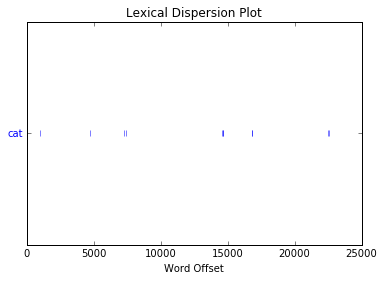

In [45]:
# Where does the word 'cat' appear in Alice and Wonderland?
%matplotlib inline
alice_text_obj.dispersion_plot(['cat'])

## Lab Part 3

###Stemming
What:  Reduce a word to its base/stem form

Why:   Often makes sense to treat multiple word forms the same way

Notes: Uses a "simple" and fast rule-based approach
       Output can be undesirable for irregular words
       Stemmed words are usually not shown to users (used for analysis/indexing)
       Some search engines treat words with the same stem as synonyms

In [ ]:
# Create an English stemmer that uses the Snowball technique
# nltk.stem.snowball.SnowballStemmer


In [ ]:
# Stem the following words: charge, charging, charged


In [ ]:
# Can you stem "words" with punctuation in them? Or which have no letters?

In [ ]:
# Create a new list of words from the novels by dropping out spurious non-words.
# You might find word_is_just_letters() helpful
def word_is_just_letters(word):
    import re
    return re.search('^[a-zA-Z]+', word)


In [ ]:
# Stem all those words

In [ ]:
# create two collections.Counter objects (one for each novel)
# so that you can easily count word stems. If you give
# the stemmed lists as an argument to constructor, 
# you can use .most_common(25) to get the top 25 tokens



###Lemmatization / synset
What:  Derive the canonical form ('lemma') of a word
    
Why:   Can be better than stemming, reduces words to a 'normal' form.
    
Notes: Uses a dictionary-based approach (slower than stemming)
    

In [ ]:
# What synsets does 'dog' belong to?

In [ ]:
# Which synset is the one you were thinking of?

In [ ]:
# What is its hypernym?

In [ ]:
# What about wolves? What synsets does it belong to?

In [ ]:
# How closely related are those concepts (dogs and wolves)?

In [ ]:
# How closely related are the concepts 'dog' and 'novel'?


## Lab Part 3 Part of speech tagging

Other:
- Analysing data with the Alchemy API
- Further Reading

###Part of Speech Tagging

What:  Determine the part of speech of a word
    
Why:   This can inform other methods and models such as Named Entity Recognition
    
Notes: http://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [ ]:
# Use nltk.pos_tag to parse a sentence


In [ ]:
# (Optional for the enthusiastic)
# What verbs did Jane Austen use a lot of?

## Lab Part 4
###Stopword Removal

What:  Remove common words that will likely appear in any text
    
Why:   They don't tell you much about your text

In [ ]:
# most of top 25 stemmed tokens are "worthless"
c.most_common(25)

In [ ]:
# view the list of stopwords
stopwords = nltk.corpus.stopwords.words('english')
sorted(stopwords)

In [ ]:
##################
### Exercise  ####
##################


# Create a variable called stemmed_stops which is the 
# stemmed version of each stopword in stopwords
# Use the stemmer we used up above!

# Then create a list called stemmed_tokens_no_stop that 
# contains only the tokens in stemmed_tokens that aren't in 
# stemmed_stops

# Show the 25 most common stemmed non stop word tokens

## Lab Part 5
###Named Entity Recognition

What:  Automatically extract the names of people, places, organizations, etc.

Why:   Can help you to identify "important" words

Notes: Training NER classifier requires a lot of annotated training data
       Should be trained on data relevant to your task
       Stanford NER classifier is the "gold standard"

In [ ]:
sentence = 'Ian is an instructor for General Assembly'

tokenized = nltk.word_tokenize(sentence)

tokenized

In [ ]:
tagged = nltk.pos_tag(tokenized)

tagged


In [ ]:
chunks = nltk.ne_chunk(tagged)

chunks


In [ ]:
def extract_entities(text):
    entities = []
    # tokenize into sentences
    for sentence in nltk.sent_tokenize(text):
        # tokenize sentences into words
        # add part-of-speech tags
        # use NLTK's NER classifier
        chunks = nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sentence)))
        # parse the results
        entities.extend([chunk for chunk in chunks if hasattr(chunk, 'label')])
    return entities

for entity in extract_entities('Ian is an instructor for General Assembly'):
    print '[' + entity.label() + '] ' + ' '.join(c[0] for c in entity.leaves())

## Lab Part 6
###Term Frequency - Inverse Document Frequency (TF-IDF)

What:  Computes "relative frequency" that a word appears in a document
           compared to its frequency across all documents

Why:   More useful than "term frequency" for identifying "important" words in
           each document (high frequency in that document, low frequency in
           other documents)

Notes: Used for search engine scoring, text summarization, document clustering

How: 
    TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).
    IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [ ]:
sample = ['Bob likes sports', 'Bob hates sports', 'Bob likes likes trees']

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()


In [ ]:
# Each row represents a sentence
# Each column represents a word
vect.fit_transform(sample).toarray()
vect.get_feature_names()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit_transform(sample).toarray()
tfidf.get_feature_names()


In [ ]:
# the IDF of each word
idf = tfidf.idf_
print dict(zip(tfidf.get_feature_names(), idf))


In [ ]:
###############
## Exercise ###
###############


# for each sentence in sample, find the most "interesting 
#words" by ordering their tfidf in ascending order


## Lab Part 7

###LDA - Latent Dirichlet Allocation

What:  Way of automatically discovering topics from sentences

Why:   Much quicker than manually creating and identifying topic clusters

In [ ]:
import lda

# Instantiate a count vectorizer with two additional parameters
vect = CountVectorizer(stop_words='english', ngram_range=[1,3]) 
sentences_train = vect.fit_transform(sentences)


In [ ]:
# Instantiate an LDA model
model = lda.LDA(n_topics=10, n_iter=500)
model.fit(sentences_train) # Fit the model 
n_top_words = 10
topic_word = model.topic_word_
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vect.get_feature_names())[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}'.format(i, ', '.join(topic_words)))


In [ ]:
# EXAMPLE: Automatically summarize a document


# corpus of 2000 movie reviews
from nltk.corpus import movie_reviews
reviews = [movie_reviews.raw(filename) for filename in movie_reviews.fileids()]


In [ ]:
# create document-term matrix
tfidf = TfidfVectorizer(stop_words='english')
dtm = tfidf.fit_transform(reviews)
features = tfidf.get_feature_names()

In [ ]:
import numpy as np


In [ ]:
# find the most and least "interesting" sentences in a randomly selected review
def summarize():
    
    # choose a random movie review    
    review_id = np.random.randint(0, len(reviews))
    review_text = reviews[review_id]

    # we are going to score each sentence in the review for "interesting-ness"
    sent_scores = []
    # tokenize document into sentences
    for sentence in nltk.sent_tokenize(review_text):
        # exclude short sentences
        if len(sentence) > 6:
            score = 0
            token_count = 0
            # tokenize sentence into words
            tokens = nltk.word_tokenize(sentence)
            # compute sentence "score" by summing TFIDF for each word
            for token in tokens:
                if token in features:
                    score += dtm[review_id, features.index(token)]
                    token_count += 1
            # divide score by number of tokens
            sent_scores.append((score / float(token_count + 1), sentence))

    # lowest scoring sentences
    print '\nLOWEST:\n'
    for sent_score in sorted(sent_scores)[:3]:
        print sent_score[1]

    # highest scoring sentences
    print '\nHIGHEST:\n'
    for sent_score in sorted(sent_scores, reverse=True)[:3]:
        print sent_score[1]

# try it out!
summarize()

## Lab Part 8

In [ ]:
# TextBlob Demo: "Simplified Text Processing"
# Installation: pip install textblob
! pip install textblob

In [ ]:
from textblob import TextBlob, Word

In [ ]:
# identify words and noun phrases
blob = TextBlob('Greg and Adrian are instructors for General Assembly')
blob.words
blob.noun_phrases

In [ ]:
# sentiment analysis
blob = TextBlob('I hate this horrible movie. This movie is not very good.')
blob.sentences
blob.sentiment.polarity
[sent.sentiment.polarity for sent in blob.sentences]

In [ ]:
# sentiment subjectivity
TextBlob("I am a cool person").sentiment.subjectivity # Pretty subjective
TextBlob("I am a person").sentiment.subjectivity # Pretty objective
# different scores for essentially the same sentence
print TextBlob('Greg and Adrian are instructors for General Assembly in Sydney').sentiment.subjectivity



In [ ]:
# singularize and pluralize
blob = TextBlob('Put away the dishes.')
[word.singularize() for word in blob.words]

In [ ]:
[word.pluralize() for word in blob.words]


In [ ]:
# spelling correction
blob = TextBlob('15 minuets late')
blob.correct()

In [ ]:
# spellcheck
Word('parot').spellcheck()


In [ ]:
# definitions
Word('bank').define()
Word('bank').define('v')

In [ ]:
# translation and language identification
blob = TextBlob('Welcome to the classroom.')
blob.translate(to='es')
blob = TextBlob('Hola amigos')
blob.detect_language()